In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# pivot_table

In [59]:
df = pd.read_excel("https://github.com/dm-fedorov/pandas_basic/raw/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/salesfunnel.xlsx")
df.head(1)

Account             Name           Rep       Manager Product  Quantity  \
0   714466  Trantow-Barrows  Craig Booker  Debra Henley     CPU         1   

   Price     Status  
0  30000  presented

In [39]:
df.shape

(17, 8)

In [33]:
df.describe(include='O')

Name           Rep       Manager Product     Status
count                17            17            17      17         17
unique               12             5             2       4          4
top     Trantow-Barrows  Craig Booker  Debra Henley     CPU  presented
freq                  3             4             9       9          6

In [34]:
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won", "pending", "presented", "declined"], inplace=True)

In [53]:
pd.pivot_table(df, 
               index=['Manager', 'Rep', 'Product'], 
               values=['Price', 'Quantity'],
               aggfunc=[np.sum, np.mean],
               fill_value=0,
               margins=True)

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

In [56]:
table = pd.pivot_table(df, 
                       index=["Manager", "Status"],
                       columns=["Product"],
                       values=["Quantity", "Price"],
                       aggfunc={"Quantity": len, "Price": np.sum},
                       fill_value=0,
                       margins=True)

In [57]:
table.query('Manager==["Debra Henley"]')

Price                                     Quantity  \
Product                   CPU Maintenance Monitor Software    All      CPU   
Manager      Status                                                          
Debra Henley declined   70000           0       0        0  70000        2   
             pending    40000       10000       0        0  50000        1   
             presented  30000           0       0    20000  50000        1   
             won        65000           0       0        0  65000        1   

                                                         
Product                Maintenance Monitor Software All  
Manager      Status                                      
Debra Henley declined            0       0        0   2  
             pending             2       0        0   3  
             presented           0       0        2   3  
             won                 0       0        0   1

# crosstab

In [66]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

df_raw = pd.read_csv("https://github.com/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/imports-85.data?raw=true",
                     header=None,
                     names=headers,
                     na_values="?")
df_raw.head()

symboling  normalized_losses         make fuel_type aspiration num_doors  \
0          3                NaN  alfa-romero       gas        std       two   
1          3                NaN  alfa-romero       gas        std       two   
2          1                NaN  alfa-romero       gas        std       two   
3          2              164.0         audi       gas        std      four   
4          2              164.0         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
1         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
2         mpfi  2.68    3.47               9.0      154.0    5000.0       19   
3         mpfi  3.19    3.40              10.0      102.0    5500.0       24   
4         mpfi  3.19    3.40               8.0      115.0    5500.0       18   

   highway_mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0  

[5 rows x 26 columns]

In [68]:
df_raw.describe()

symboling  normalized_losses  wheel_base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb_weight  engine_size        bore      stroke  \
count  205.000000   205.000000   205.000000  201.000000  201.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.273539    0.316717   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.590000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression_ratio  horsepower     peak_rpm    city_mpg  highway_mpg  \
count         205.000000  203.000000   203.000000  205.000000   205.000000   
mean           10.142537  104.256158  5125.369458   25.219512    30.751220   
std             3.972040   39.714369   479.334560    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [87]:
df_raw.groupby('make')['price'].agg(['mean', 'max']).round().sort_values('mean', ascending=False)

mean      max
make                           
jaguar         34600.0  36000.0
mercedes-benz  33647.0  45400.0
porsche        31400.0  37028.0
bmw            26119.0  41315.0
volvo          18063.0  22625.0
audi           17859.0  23875.0
mercury        16503.0  16503.0
alfa-romero    15498.0  16500.0
peugot         15489.0  18150.0
saab           15223.0  18620.0
mazda          10653.0  18344.0
nissan         10416.0  19699.0
volkswagen     10078.0  13845.0
toyota          9886.0  17669.0
renault         9595.0   9895.0
mitsubishi      9240.0  14869.0
isuzu           8916.0  11048.0
subaru          8541.0  11694.0
honda           8185.0  12945.0
plymouth        7963.0  12764.0
dodge           7875.0  12964.0
chevrolet       6007.0   6575.0

In [70]:
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

df = df_raw[df_raw.make.isin(models)].copy()
df.head()

symboling  normalized_losses   make fuel_type aspiration num_doors  \
30          2              137.0  honda       gas        std       two   
31          2              137.0  honda       gas        std       two   
32          1              101.0  honda       gas        std       two   
33          1              101.0  honda       gas        std       two   
34          1              101.0  honda       gas        std       two   

   body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
30  hatchback          fwd           front        86.6  ...           92   
31  hatchback          fwd           front        86.6  ...           92   
32  hatchback          fwd           front        93.7  ...           79   
33  hatchback          fwd           front        93.7  ...           92   
34  hatchback          fwd           front        93.7  ...           92   

    fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
30         1bbl  2.91    3.41               9.6       58.0    4800.0       49   
31         1bbl  2.91    3.41               9.2       76.0    6000.0       31   
32         1bbl  2.91    3.07              10.1       60.0    5500.0       38   
33         1bbl  2.91    3.41               9.2       76.0    6000.0       30   
34         1bbl  2.91    3.41               9.2       76.0    6000.0       30   

    highway_mpg   price  
30           54  6479.0  
31           38  6855.0  
32           42  5399.0  
33           34  6529.0  
34           34  7129.0  

[5 rows x 26 columns]

In [122]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels], margins=True)

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   
All                    1   1       1   3         1  35  13     2  42  13   

body_style   wagon          All  
drive_wheels   4wd fwd rwd       
make                             
honda            0   1   0   13  
mazda            0   0   0   17  
mitsubishi       0   0   0   13  
nissan           0   3   0   18  
subaru           2   2   0   12  
toyota           2   1   1   32  
volkswagen       0   1   0   12  
volvo            0   0   3   11  
All              4   8   4  128

In [100]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style  convertible  hardtop  hatchback  sedan  wagon
make                                                     
honda               0.0      0.0        7.0    5.0    1.0
mazda               0.0      0.0       10.0    7.0    0.0
mitsubishi          0.0      0.0        9.0    4.0    0.0
nissan              0.0      1.0        5.0    9.0    3.0
subaru              0.0      0.0        3.0    5.0    4.0
toyota              1.0      3.0       14.0   10.0    4.0
volkswagen          1.0      0.0        1.0    9.0    1.0
volvo               0.0      0.0        0.0    8.0    3.0

In [107]:
pd.pivot_table(df,
              index=['make'],
              columns=['body_style'],
              aggfunc={'body_style':len},
              fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

In [108]:
pd.crosstab(df.make,
            df.num_doors,
            margins=True,
            margins_name="Total")

num_doors   four  two  Total
make                        
honda          5    8     13
mazda          7    9     16
mitsubishi     4    9     13
nissan         9    9     18
subaru         9    3     12
toyota        18   14     32
volkswagen     8    4     12
volvo         11    0     11
Total         71   56    127

In [113]:
pd.crosstab(df.make,
            df.body_style,
            values=df.curb_weight,
            aggfunc='mean').round(0).fillna(0)

body_style  convertible  hardtop  hatchback   sedan   wagon
make                                                       
honda               0.0      0.0     1970.0  2289.0  2024.0
mazda               0.0      0.0     2254.0  2361.0     0.0
mitsubishi          0.0      0.0     2377.0  2394.0     0.0
nissan              0.0   2008.0     2740.0  2238.0  2452.0
subaru              0.0      0.0     2137.0  2314.0  2454.0
toyota           2975.0   2585.0     2370.0  2338.0  2708.0
volkswagen       2254.0      0.0     2221.0  2342.0  2563.0
volvo               0.0      0.0        0.0  3023.0  3078.0

In [123]:
pd.crosstab(df.make,
            [df.body_style, df.drive_wheels],
            values=df.curb_weight,
            aggfunc='mean').fillna('-')

body_style   convertible       hardtop       hatchback                    \
drive_wheels         fwd   rwd     fwd   rwd       4wd      fwd      rwd   
make                                                                       
honda                  -     -       -     -         -     1970        -   
mazda                  -     -       -     -         -  2148.33  2411.25   
mitsubishi             -     -       -     -         -  2376.56        -   
nissan                 -     -    2008     -         -     2176  3116.33   
subaru                 -     -       -     -      2240     2085        -   
toyota                 -  2975       -  2585         -  2177.25  2626.83   
volkswagen          2254     -       -     -         -     2221        -   
volvo                  -     -       -     -         -        -        -   

body_style     sedan                   wagon                    
drive_wheels     4wd      fwd      rwd   4wd      fwd      rwd  
make                                                            
honda              -   2288.8        -     -     2024        -  
mazda              -   2231.6     2685     -        -        -  
mitsubishi         -     2394        -     -        -        -  
nissan             -  2237.89        -     -  2452.33        -  
subaru        2447.5     2225        -  2535   2372.5        -  
toyota             -  2258.57  2521.67  2700     2280     3151  
volkswagen         -  2342.22        -     -     2563        -  
volvo              -        -     3023     -        -  3077.67

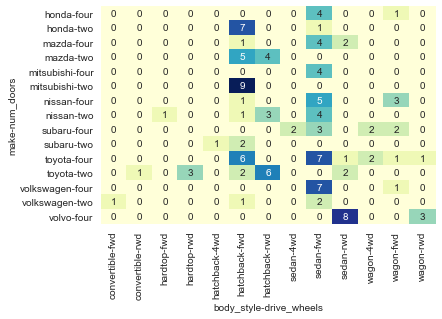

In [124]:
sns.heatmap(pd.crosstab([df.make, df.num_doors],
                        [df.body_style, df.drive_wheels]),
            cmap="YlGnBu",
            annot=True,
            cbar=False);